In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
db = pymysql.connect(host="Localhost",user="root",password="Root",database="boston_cupcakes")

<AxesSubplot:xlabel='customer_id'>

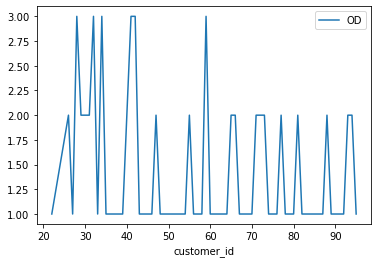

In [35]:
A = pd.read_sql_query('''select customer_id,count('Order_id') as OD from orderplacement
group by 1 ''',db)
dataf = pd.DataFrame(A,columns = ['customer_id','OD'])
dataf.plot(x='customer_id',y='OD')

<AxesSubplot:xlabel='customer_id'>

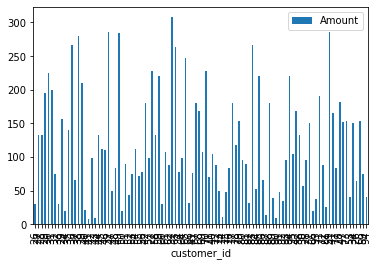

In [33]:
A = pd.read_sql_query('''select d.customer_id,b.Amount from bill b 
                        inner join payment p 
                        on b.Payment_id=p.Payment_id 
                        
inner join orderplacement d on 
                        p.Order_id=d.Order_id''',db)

dataf = pd.DataFrame(A,columns = ['customer_id','Amount'])
dataf.plot(x='customer_id',y='Amount',kind='bar')

In [13]:


A = pd.read_sql_query('''select p.Product_id, a.total_ordered

from product p join

(select Product_id, sum(quantity) as total_ordered from orders group by Product_id order by total_ordered desc) a

where p.Product_id=a.Product_id order by total_ordered desc''',db)


<AxesSubplot:xlabel='Product_id'>

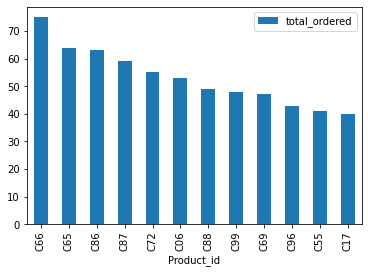

In [14]:
dataf = pd.DataFrame(A,columns = ['Product_id','total_ordered'])
dataf.plot(x='Product_id',y='total_ordered',kind='bar')